In [0]:
# !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'dashlink/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from fastai.vision import *

In [0]:
# path = Path('Tail_687_1/png1'); path
# trnpath = Path(base_dir + 'Tail_687_1'); trnpath
trnpath = Path(base_dir + 'Train'); trnpath

PosixPath('/content/gdrive/My Drive/dashlink/Train')

In [0]:
# set output folder
outpath = Path('png3a'); outpath

PosixPath('png3a')

In [0]:
# path.ls()
! ls -alh "{trnpath}"/{outpath}

total 99M
-rw------- 1 root root  99M Sep 14 15:41 export.pkl
drwx------ 2 root root 4.0K Sep  9 20:39 models
drwx------ 2 root root 4.0K Sep  9 18:42 non
drwx------ 2 root root 4.0K Sep  9 18:41 typ


## View data

In [0]:
# np.random.seed(42)
# data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [0]:
trnpath/outpath

PosixPath('/content/gdrive/My Drive/dashlink/Train/png3a')

In [0]:
# form item list
# il = ImageList.from_folder(path)
il = ImageList.from_folder(trnpath/outpath)
#il = ImageList.from_folder(path, convert_mode='L')
#il = ImageList.from_folder(path, convert_mode='1')
##il = ImageList.from_folder(path, convert_mode='0')

In [0]:
il.items[0]

PosixPath('/content/gdrive/My Drive/dashlink/Train/png3a/typ/687200104111158-1min.png')

In [0]:
#defaults.cmap='binary'

In [0]:
il

ImageList (1080 items)
Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133)
Path: /content/gdrive/My Drive/dashlink/Train/png3a

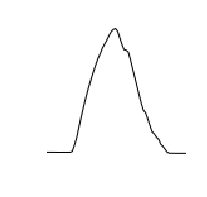

In [0]:
il[21].show()

In [0]:
# path.ls()
! ls "{trnpath}"/{outpath}

export.pkl  models  non  typ


In [0]:
# form train and valid item lists
# ils = il.split_by_rand_pct(); type(ils); ils
#set seed to always get the same validation set:
ils = il.split_by_rand_pct(valid_pct=0.2, seed=787); type(ils); ils

ItemLists;

Train: ImageList (864 items)
Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133)
Path: /content/gdrive/My Drive/dashlink/Train/png3a;

Valid: ImageList (216 items)
Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133)
Path: /content/gdrive/My Drive/dashlink/Train/png3a;

Test: None

In [0]:
# form label lists
lls = ils.label_from_folder(); lls

LabelLists;

Train: LabelList (864 items)
x: ImageList
Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133)
y: CategoryList
typ,typ,typ,typ,typ
Path: /content/gdrive/My Drive/dashlink/Train/png3a;

Valid: LabelList (216 items)
x: ImageList
Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133),Image (3, 130, 133)
y: CategoryList
typ,typ,typ,typ,typ
Path: /content/gdrive/My Drive/dashlink/Train/png3a;

Test: None

In [0]:
x,y = lls.train[7]; x,y

(Image (3, 130, 133), Category typ)

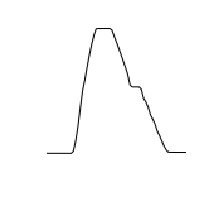

In [0]:
x.show()

In [0]:
tfms = get_transforms(do_flip=False, flip_vert=False, 
                      max_rotate=0.0, max_zoom=1, 
                      max_lighting=0, max_warp=0)

In [0]:
# lls = lls.transform(tfms)
lls = lls.transform(tfms, size=128)

In [0]:
# bs = 8
# bs = 16
bs = 32
# bs = 64

In [0]:
data = lls.databunch(bs=bs).normalize(imagenet_stats)

In [0]:
x,y = data.train_ds[4]

Category typ

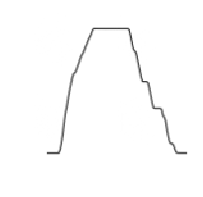

In [0]:
x.show(); y

In [0]:
xb,yb = data.one_batch()
xb.shape,yb.shape

(torch.Size([32, 3, 128, 128]), torch.Size([32]))

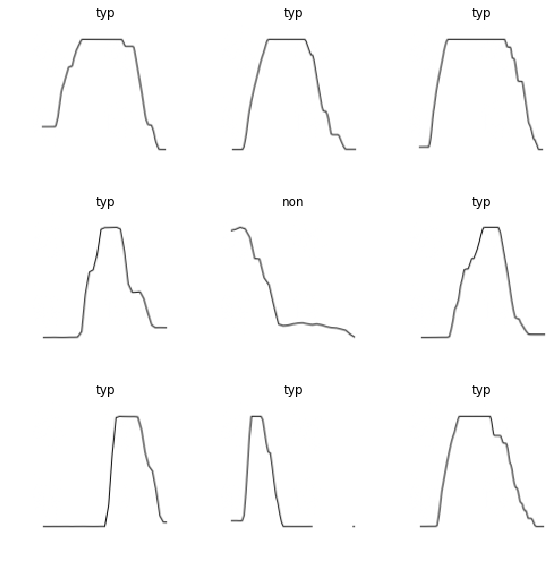

In [0]:
data.show_batch(rows=3, figsize=(8,8))

In [0]:
data.classes

['non', 'typ']

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['non', 'typ'], 2, 864, 216)

## Train model

In [0]:
# arch = models.resnet18
# arch = models.resnet34
arch = models.resnet50

Skewed classes:

https://www.youtube.com/watch?v=wGw6R8AbcuI&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN&index=67

https://www.youtube.com/watch?v=W5meQnGACGo&list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN&index=68

F1 score definition on Wikipedia:

https://en.wikipedia.org/wiki/F1_score

$$ F_\beta = (1 + \beta^2) \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{(\beta^2 \cdot \mathrm{precision}) + \mathrm{recall}} $$

If $\beta = 1$:

$$ F_1 = (1 + 1^2) \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{(1^2 \cdot \mathrm{precision}) + \mathrm{recall}} $$

So that,

$$ F_1 = 2 \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{\mathrm{precision} + \mathrm{recall}} $$





In [0]:
# fbeta(
#     y_pred:torch.Tensor, 
#     y_true:torch.Tensor, 
#     thresh:float=0.2, 
#     beta:float=2, 
#     eps:float=1e-09, 
#     sigmoid:bool=True)

In [0]:
# https://forums.fast.ai/t/f1-score-as-metric/30370/48
# https://github.com/fastai/fastai/issues/1861
# FBeta(
#     average: Union[str, NoneType] = 'binary',
#     pos_label: int = 1,
#     eps: float = 1e-09,
#     beta: float = 2,
# )

In [0]:
# F1_score = partial(fbeta, thresh=0.2, beta=1, sigmoid=True)
# F1_score = partial(fbeta, thresh=0.2, beta=2, sigmoid=True)
##F1_score = partial(FBeta, average='binary', pos_label=1, beta=2)
##F1_score = partial(FBeta, pos_label=1, beta=2)
##F1_score = partial(FBeta, beta=2)
# F1_score = partial(FBeta)

In [0]:
# learn = cnn_learner(data, arch, metrics=error_rate)

#have ps=0, wd=0 to get train_loss < valid_loss
#https://forums.fast.ai/t/validation-loss-smaller-than-training-loss/36993/4
# learn = cnn_learner(data, arch, metrics=[error_rate,accuracy], ps=0, wd=0)
# learn = cnn_learner(data, arch, metrics=[error_rate,accuracy,F1_score])
# learn = cnn_learner(data, arch, metrics=[error_rate,accuracy,FBeta(1)])
learn = cnn_learner(data, arch, 
                    metrics=[FBeta(average='binary',pos_label=1,beta=1), 
                             Precision(),                             
                             Recall(), 
                             error_rate,
                             accuracy]
                    ,ps=0, wd=0, true_wd=False, bn_wd=False                   
                    )

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


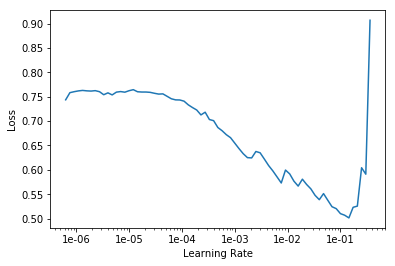

In [0]:
learn.lr_find()
#learn.lr_find(start_lr=1e-07, end_lr=10)
learn.recorder.plot()

In [0]:
# learn.fit_one_cycle(8, slice(lrf))
# learn.fit_one_cycle(16, slice(1e-2)) #
# learn.fit_one_cycle(32, slice(2e-2)) #1.00m
learn.fit_one_cycle(16, slice(3e-3)) #1.00m

epoch,train_loss,valid_loss,f_beta,precision,recall,error_rate,accuracy,time
0,0.535999,0.625333,0.759259,0.991935,0.615000,0.361111,0.638889,00:06
1,0.432177,0.462080,0.885794,1.000000,0.795000,0.189815,0.810185,00:06
2,0.309996,0.065334,0.989899,1.000000,0.980000,0.018519,0.981481,00:06
3,0.198880,0.044113,0.989950,0.994950,0.985000,0.018519,0.981481,00:06
4,0.122478,0.033045,0.992443,1.000000,0.985000,0.013889,0.986111,00:06
5,0.079319,0.021679,0.994975,1.000000,0.990000,0.009259,0.990741,00:06
6,0.048680,0.034509,0.992481,0.994975,0.990000,0.013889,0.986111,00:06
7,0.028766,0.015652,0.997506,0.995025,1.000000,0.004630,0.995370,00:06
8,0.018319,0.012986,0.997506,0.995025,1.000000,0.004630,0.995370,00:06
9,0.012118,0.030244,0.997506,0.995025,1.000000,0.004630,0.995370,00:06


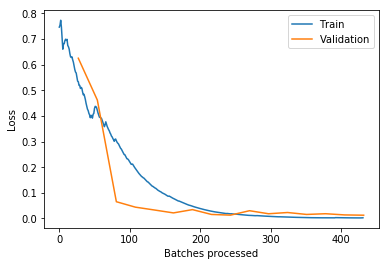

In [0]:
learn.recorder.plot_losses()

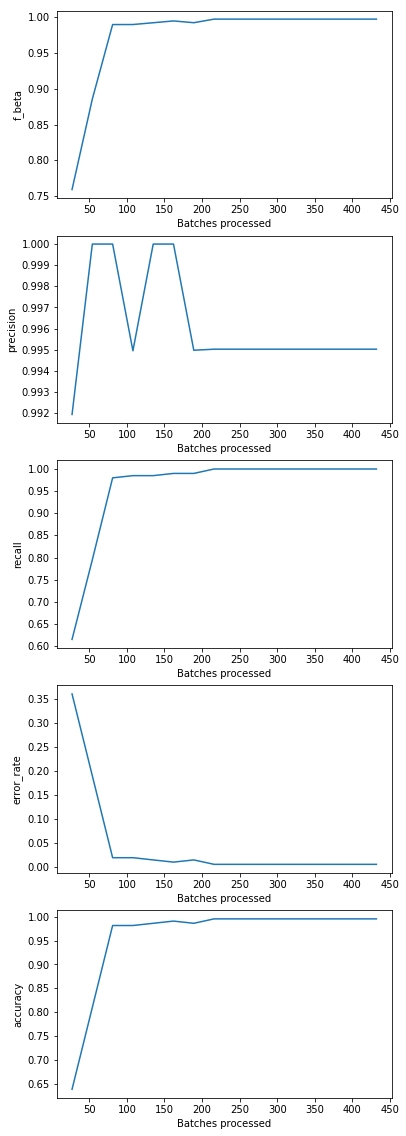

In [0]:
learn.recorder.plot_metrics()

In [0]:
learn.save('stage-1') #.997

In [0]:
#go back to learn.fit_one_cycle(...)

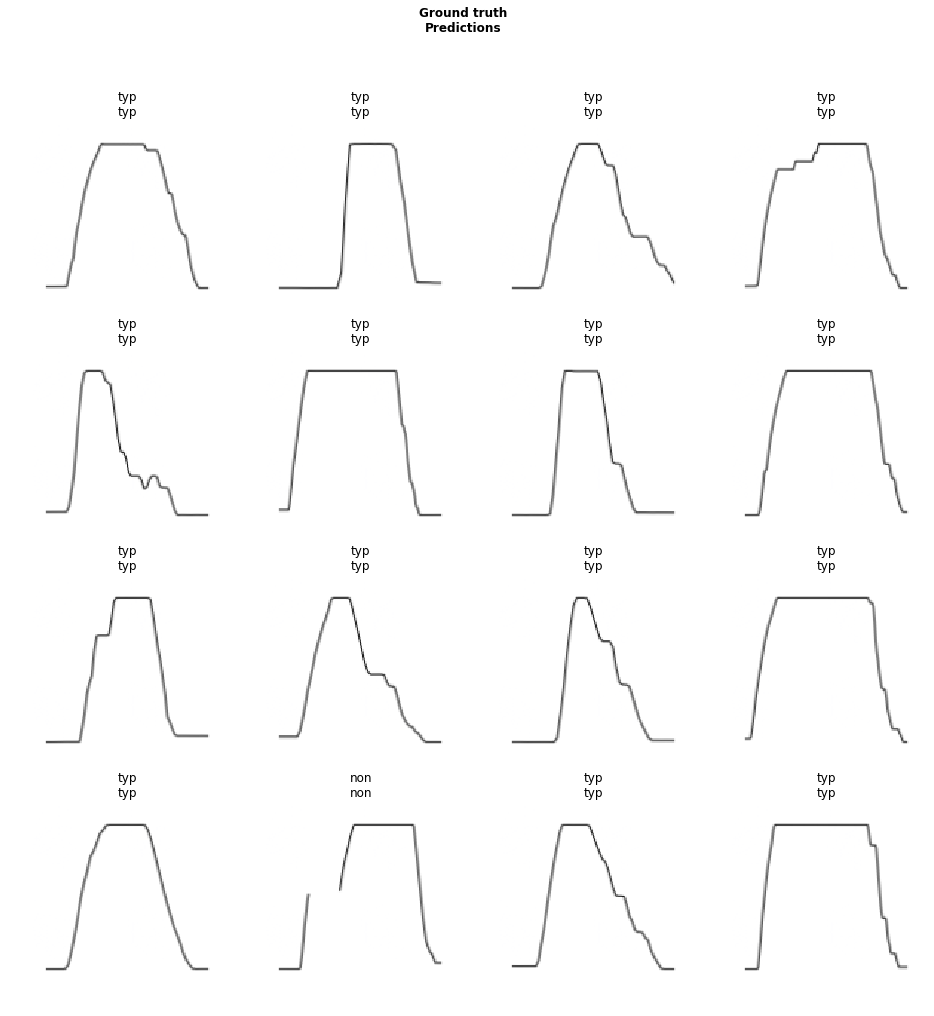

In [0]:
learn.show_results(rows=4)

In [0]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (864 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
typ,typ,typ,typ,typ
Path: /content/gdrive/My Drive/dashlink/Train/png3a;

Valid: LabelList (216 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
typ,typ,typ,typ,typ
Path: /content/gdrive/My Drive/dashlink/Train/png3a;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


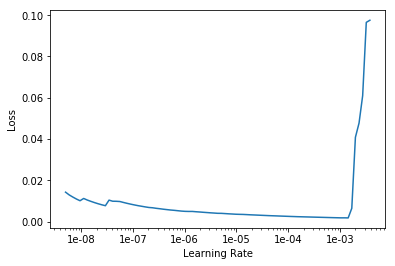

In [0]:
# learn.lr_find()
# learn.lr_find(stop_div=False)
learn.lr_find(start_lr=1e-9, end_lr=1e-2, stop_div=False)
learn.recorder.plot()

In [0]:
lrf = 3e-3 #at steepest part of curve (that was used above)
# lru = 1e-8 #at least an order below the minimum
# learn.fit_one_cycle(4, slice(lru, lrf/10))

# learn.fit_one_cycle(16, slice(1e-8, lrf/10)) #

# learn.fit_one_cycle(16, slice(1e-7, lrf/10)) #

# learn.fit_one_cycle(32, slice(1e-6, lrf/10)) #nah
# learn.fit_one_cycle(16, slice(2e-6, lrf/10)) #
# learn.fit_one_cycle(16, slice(5e-6, lrf/10)) #

learn.fit_one_cycle(16, slice(1e-5, lrf/10)) #

# learn.fit_one_cycle(16, slice(1e-4, lrf/10)) #nah

# learn.fit_one_cycle(16, slice(1e-8, lrf/5)) #
# learn.fit_one_cycle(16, slice(1e-7, lrf/5)) #
# learn.fit_one_cycle(16, slice(1e-6, lrf/5)) #
# learn.fit_one_cycle(16, slice(1e-5, lrf/5)) #

epoch,train_loss,valid_loss,f_beta,precision,recall,error_rate,accuracy,time
0,0.000635,0.007482,0.997506,0.995025,1.000000,0.004630,0.995370,00:08
1,0.001064,0.003969,1.000000,1.000000,1.000000,0.000000,1.000000,00:08
2,0.005505,0.027619,0.997506,0.995025,1.000000,0.004630,0.995370,00:08
3,0.020714,0.038961,0.992443,1.000000,0.985000,0.013889,0.986111,00:08
4,0.016940,0.048772,0.995025,0.990099,1.000000,0.009259,0.990741,00:08
5,0.015436,0.080423,0.989899,1.000000,0.980000,0.018519,0.981481,00:08
6,0.013648,0.005696,1.000000,1.000000,1.000000,0.000000,1.000000,00:08
7,0.008812,0.005195,0.997506,0.995025,1.000000,0.004630,0.995370,00:08
8,0.006052,0.009931,0.997506,0.995025,1.000000,0.004630,0.995370,00:08
9,0.004010,0.006699,0.997506,0.995025,1.000000,0.004630,0.995370,00:08


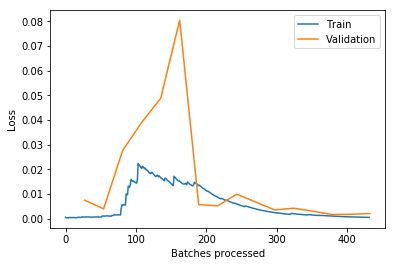

In [0]:
learn.recorder.plot_losses()

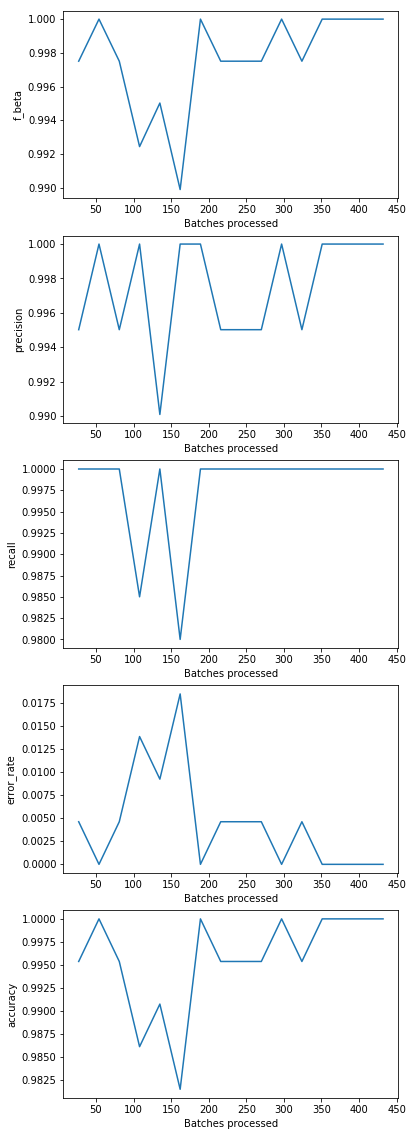

In [0]:
learn.recorder.plot_metrics()

In [0]:
# learn.save('stage-2') #.009
learn.save('stage-2') #1.00

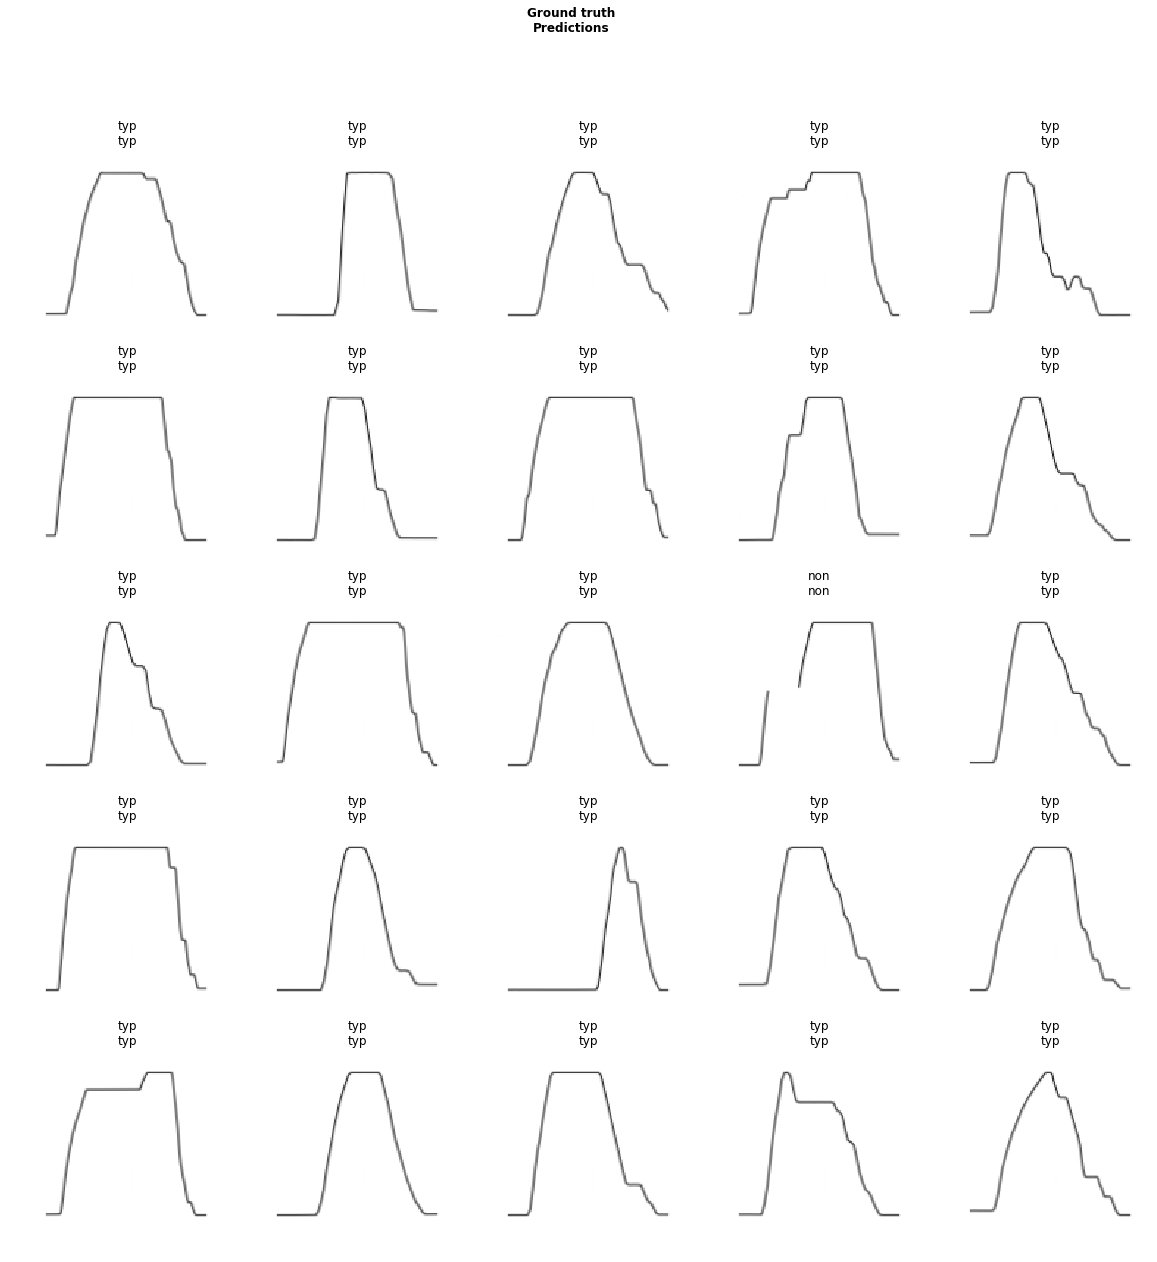

In [0]:
learn.show_results()

## Interpretation

In [0]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (864 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
typ,typ,typ,typ,typ
Path: /content/gdrive/My Drive/dashlink/Train/png3a;

Valid: LabelList (216 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
typ,typ,typ,typ,typ
Path: /content/gdrive/My Drive/dashlink/Train/png3a;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

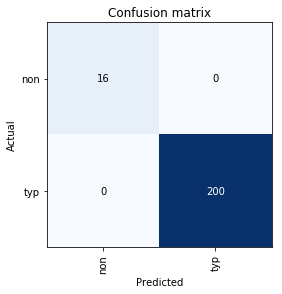

In [0]:
interp.plot_confusion_matrix() #216 items in validation set

In [0]:
TP = 200 #True Positives
FP = 0 #False Positives
FN = 0 #False Negatives
precision = TP/(TP + FP) #TP / prediction positives
recall = TP/(TP + FN) #TP / actual positives
F1_score = 2*( (precision*recall) / (precision+recall) )
precision,recall,F1_score

(1.0, 1.0, 1.0)

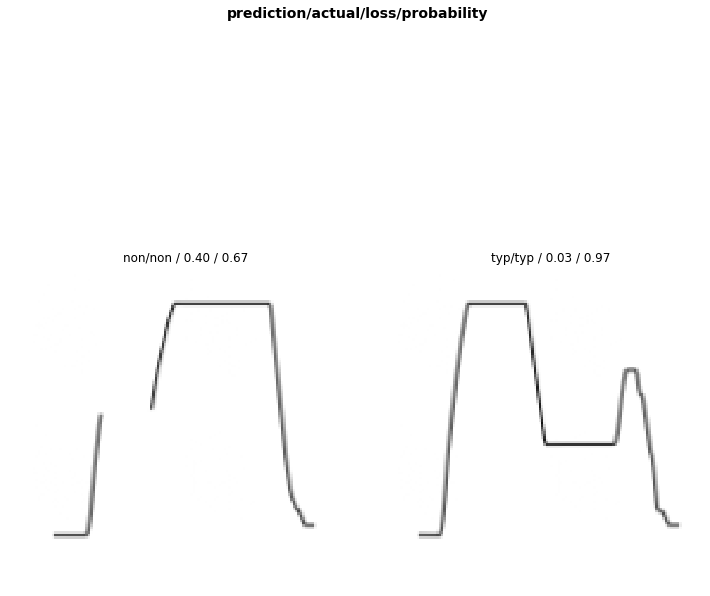

In [0]:
interp.plot_top_losses(2)

In [0]:
# losses,idxs = interp.top_losses()
# idxs

In [0]:
# top_loss_paths = data.valid_ds.x[idxs]
# top_loss_paths

## Cleaning Up

In [0]:
# from fastai.widgets import *

In [0]:
# # db = (ImageList.from_folder(path)
# db = (ImageList.from_folder(trnpath/outpath)
#                    .no_split()
#                    .label_from_folder()
# #                   .transform(get_transforms(), size=224)
#                    .transform(get_transforms(), size=133)      
#                    .databunch()
#      )

In [0]:
# If you already cleaned your data using indexes from `from_toplosses`,
# run this cell instead of the one before to proceed with removing duplicates.
# Otherwise all the results of the previous step would be overwritten by
# the new run of `ImageCleaner`.

# db = (ImageList.from_csv(path, 'cleaned.csv', folder='.')
#                    .no_split()
#                    .label_from_df()
#                    .transform(get_transforms(), size=224)
#                    .databunch()
#      )

In [0]:
#learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)
# learn_cln = cnn_learner(db, models.resnet18, metrics=error_rate)

# learn_cln.load('stage-2');

In [0]:
# ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [0]:
# ImageCleaner(ds, idxs, path)
# ImageCleaner(ds, idxs, trnpath/outpath)

In [0]:
# ds, idxs = DatasetFormatter().from_similars(learn_cln)

In [0]:
# ImageCleaner(ds, idxs, path, duplicates=True)

## Test Inference/Production (on train data)

In [0]:
learn.export()

In [0]:
!ls -altrh "{trnpath}"/{outpath}/export.pkl

-rw------- 1 root root 99M Sep 17 17:02 '/content/gdrive/My Drive/dashlink/Train/png3a/export.pkl'


In [0]:
# (path/'non').ls()
# (trnpath/outpath/'non').ls()
!ls "{trnpath}"/{outpath}/non

687200104201603-1min.png  687200107251920-1min.png  687200108222148-1min.png
687200104231716-1min.png  687200107260900-1min.png  687200108232302-1min.png
687200104241309-1min.png  687200107271412-1min.png  687200108281634-1min.png
687200107040653-1min.png  687200107280607-1min.png  687200108312039-1min.png
687200107041424-1min.png  687200107282131-1min.png  687200109041600-1min.png
687200107051019-1min.png  687200107291717-1min.png  687200109071716-1min.png
687200107061455-1min.png  687200107302302-1min.png  687200109111355-1min.png
687200107061632-1min.png  687200107312026-1min.png  687200109111953-1min.png
687200107081722-1min.png  687200107312325-1min.png  687200109141623-1min.png
687200107082004-1min.png  687200108011714-1min.png  687200109181713-1min.png
687200107091957-1min.png  687200108021547-1min.png  687200109211703-1min.png
687200107092152-1min.png  687200108031503-1min.png  687200109231648-1min.png
687200107101259-1min.png  687200108042135-1min.png  687200109241650-1min.png

In [0]:
# learn = load_learner(path)
learn = load_learner(trnpath/outpath)

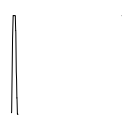

In [0]:
# img = open_image(path/'non'/'687200107241645-1min.png'); img
img = open_image(trnpath/outpath/'non'/'687200112271635-1min.png'); img

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class,pred_idx,outputs

(Category non, tensor(0), tensor([1.0000e+00, 1.9749e-07]))